Data Scientist Workshop - ex.10.1 - Adam Trentowski, 162602

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
%matplotlib inline
from matplotlib.colors import ListedColormap

## Data load and split

In [2]:
df = pd.read_csv('D:/Projekty/DataScientistWorkshop/lab_10/files/vlagun_DT_SVM8.csv')

In [4]:
df.head()

,Cyanobacteria,Chlorophyceae,Diatomophyceae,picophytoplankton,Diaphanosoma_brachyurum,Acartia_longiremis,Eurytemora_affinis,Cyclops_sp,Basin
0,2.35,3.08,0.230,3.20,0.0001,2.0710,0.9251,0.0001,Eastern
1,6.39,2.87,0.010,2.42,0.0001,0.5014,0.0001,0.0001,Eastern
2,2.05,7.47,0.060,2.61,0.0001,0.0931,0.0001,0.0093,Eastern
3,6.30,5.03,0.110,2.49,0.0001,0.0001,0.0129,0.0060,Eastern
4,3.77,5.69,0.005,1.73,0.0001,0.0001,0.0141,0.0001,Eastern


In [6]:
df.Basin = [1 if i == 'Western' else 0 for i in df.Basin]

In [7]:
df.head()

,Cyanobacteria,Chlorophyceae,Diatomophyceae,picophytoplankton,Diaphanosoma_brachyurum,Acartia_longiremis,Eurytemora_affinis,Cyclops_sp,Basin
0,2.35,3.08,0.230,3.20,0.0001,2.0710,0.9251,0.0001,0
1,6.39,2.87,0.010,2.42,0.0001,0.5014,0.0001,0.0001,0
2,2.05,7.47,0.060,2.61,0.0001,0.0931,0.0001,0.0093,0
3,6.30,5.03,0.110,2.49,0.0001,0.0001,0.0129,0.0060,0
4,3.77,5.69,0.005,1.73,0.0001,0.0001,0.0141,0.0001,0


In [8]:
X = df.drop('Basin', axis=1)
y = df['Basin']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(f'Training data points: {X_train.shape[0]}')
print(f'Testing data points: {X_test.shape[0]}')
print(f'Class: {np.unique(y)}')

Training data points: 108
Testing data points: 47
Class: [0 1]


## Tree

In [26]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5, random_state=0)

tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print(f'Misclassified samples: {(y_test != y_pred).sum()}')
print(f'Test dataset accuracy (tree): {(y_test == y_pred).sum() / y_test.shape[0]:.2f}%')

Misclassified samples: 14
Test dataset accuracy (tree): 0.70%


In [30]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5, random_state=0)

tree.fit(X_train, y_train)
y_pred = tree.predict(X_train)

print(f'Misclassified samples: {(y_train != y_pred).sum()}')
print(f'Train dataset accuracy (tree): {(y_train == y_pred).sum() / y_train.shape[0]:.2f}%')

Misclassified samples: 28
Train dataset accuracy (tree): 0.74%


In [54]:
export_graphviz(tree, out_file='tree_1.dot', feature_names=X.columns.values)

![Tree graph](tree_1.png)


## Forest

In [31]:
forest = RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=1, n_jobs=2)

forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, n_jobs=2,
                       random_state=1)

In [32]:
y_pred = forest.predict(X_test)
print(f'Test dataset accuracy (forest): {accuracy_score(y_test, y_pred):.4f}%')

Test dataset accuracy (forest): 0.7021%


In [33]:
y_pred = forest.predict(X_train)
print(f'Train dataset accuracy (forest): {accuracy_score(y_train, y_pred):.4f}%')

Train dataset accuracy (forest): 1.0000%


## Feature Importances

In [39]:
importances = forest.feature_importances_
# get sort indices in descending order
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print('%2d) %-*s %f' % (f + 1, 26,
                            X.columns.values[indices[f]],
                            importances[indices[f]]))

 1) Cyclops_sp                 0.202485
 2) Cyanobacteria              0.155161
 3) Chlorophyceae              0.140234
 4) Diatomophyceae             0.132772
 5) picophytoplankton          0.131438
 6) Acartia_longiremis         0.087611
 7) Eurytemora_affinis         0.083678
 8) Diaphanosoma_brachyurum    0.066621


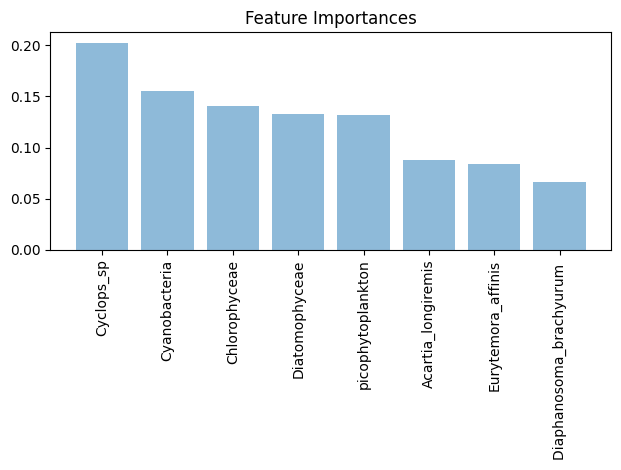

In [40]:
plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center',
        alpha=0.5)

plt.xticks(range(X_train.shape[1]),
           X.columns.values[indices], rotation=90)
plt.tight_layout()
plt.show()

## Distribution in 2 most important features
### Cyclops_sp and Cyanobacteria

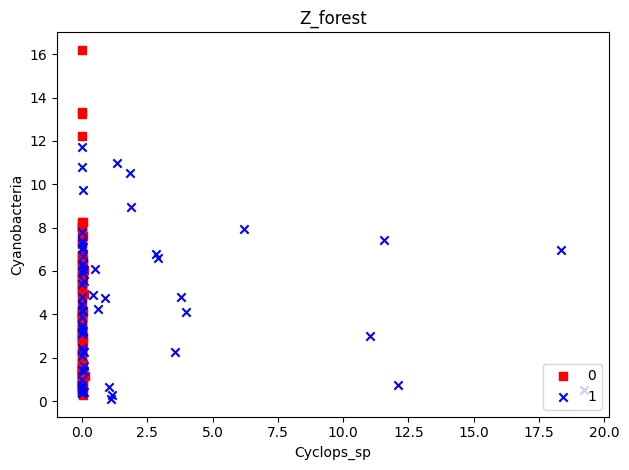

In [42]:
Z_forest = X[['Cyclops_sp', 'Cyanobacteria']].values

colors = ['r', 'b', 'g', 'k']
markers = ['s', 'x', 'o', '^']
for l, c, m in zip(np.unique(y.values), colors, markers):
    plt.scatter(Z_forest[y.values == l, 0],
                Z_forest[y.values == l, 1],
                c=c, label=l, marker=m)
    
plt.title('Z_forest')
plt.xlabel('Cyclops_sp')
plt.ylabel('Cyanobacteria')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## Test and train accuracy
### Tree_forest

In [43]:
Z_forest_train, Z_forest_test, y_forest_train, y_forest_test = train_test_split(Z_forest, y, test_size=0.3, random_state=0)

tree_forest = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5, random_state=0)
tree_forest.fit(Z_forest_train, y_forest_train)

y_forest_pred = tree_forest.predict(Z_forest_test)
print(f'Test dataset accuracy (tree_forest): {accuracy_score(y_forest_test, y_forest_pred):.2f}%')

Test dataset accuracy (tree_forest): 0.70%


In [44]:
Z_forest_train, Z_forest_test, y_forest_train, y_forest_test = train_test_split(Z_forest, y, test_size=0.3, random_state=0)

tree_forest = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5, random_state=0)
tree_forest.fit(Z_forest_train, y_forest_train)

y_forest_pred = tree_forest.predict(Z_forest_train)
print(f'Train dataset accuracy (tree_forest): {accuracy_score(y_forest_train, y_forest_pred):.2f}%')

Train dataset accuracy (tree_forest): 0.80%


## Feature Selection

In [46]:
sfm = SelectFromModel(forest, threshold=0.075, prefit=True)
Z_forest_alt = sfm.transform(X)

for f in range(Z_forest_alt.shape[1]):
    print('%2d) %-*s %f' % (f + 1, 26,
                            X.columns.values[indices[f]],
                            importances[indices[f]]))

 1) Cyclops_sp                 0.202485
 2) Cyanobacteria              0.155161
 3) Chlorophyceae              0.140234
 4) Diatomophyceae             0.132772
 5) picophytoplankton          0.131438
 6) Acartia_longiremis         0.087611
 7) Eurytemora_affinis         0.083678


D:\Projekty\DataScientistWorkshop\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


## Test and train accuracy
### Forest_forest

In [47]:
# train a random forest based on Z_forest

forest_forest = RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=1, n_jobs=2)

forest_forest.fit(Z_forest_train, y_forest_train)

y_forest_pred = forest_forest.predict(Z_forest_test)
print(f'Test dataset accuracy (forest_forest): {accuracy_score(y_forest_test, y_forest_pred):.2f}%')

Test dataset accuracy (forest_forest): 0.55%


In [48]:
forest_forest = RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=1, n_jobs=2)

forest_forest.fit(Z_forest_train, y_forest_train)

y_forest_pred = forest_forest.predict(Z_forest_train)
print(f'Train dataset accuracy (forest_forest): {accuracy_score(y_forest_train, y_forest_pred):.2f}%')

Train dataset accuracy (forest_forest): 1.00%


## Visualization

In [51]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and colormap
    markers = ('s', 'x', 'o', '^', 'v',)
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[: len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x = X[y == cl, 0],
            y = X[y == cl, 1],
            alpha=0.8,
            c=[cmap(idx)],  # prevents warning
            marker=markers[idx],
            label=cl
        )
    
    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='c',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set', edgecolors='k')

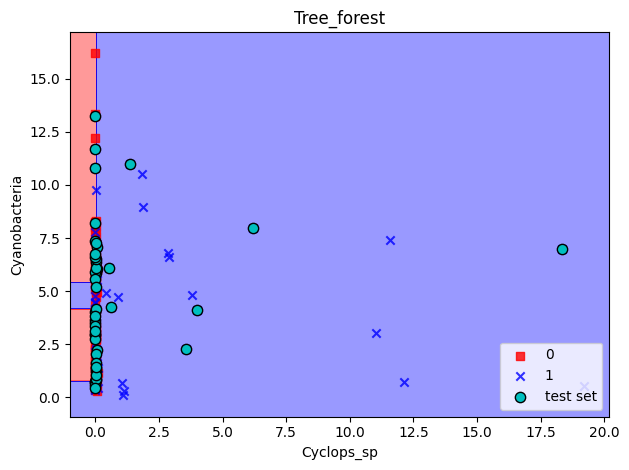

In [52]:
# plot boundaries of tree_forest

Z_forest_combined = np.vstack((Z_forest_train, Z_forest_test))
y_forest_combined = np.hstack((y_forest_train, y_forest_test))
plot_decision_regions(
    Z_forest_combined,
    y_forest_combined,
    classifier=tree_forest,
    test_idx=range(
        y_forest_train.shape[0],
        y_forest_train.shape[0] + y_forest_test.shape[0]
    )
)

plt.title('Tree_forest')
plt.xlabel('Cyclops_sp')
plt.ylabel('Cyanobacteria')
plt.legend(loc='lower right')
plt.tight_layout()

plt.show()

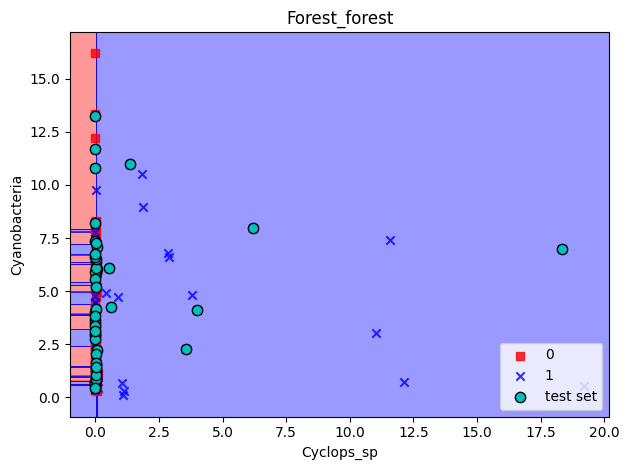

In [53]:
plot_decision_regions(
    Z_forest_combined,
    y_forest_combined,
    classifier=forest_forest,
    test_idx=range(
        y_forest_train.shape[0],
        y_forest_train.shape[0] + y_forest_test.shape[0]
    )
)

plt.title('Forest_forest')
plt.xlabel('Cyclops_sp')
plt.ylabel('Cyanobacteria')
plt.legend(loc='lower right')
plt.tight_layout()

plt.show()